| **Inicio** | **atrás 20** | **Siguiente 22** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./20.K-Vecinos.ipynb)| [⏩](./22.Cross_validation.ipynb)|

# **21. Detección de Datos Anómalos (outliers) con Bosques de Aislamiento (iForests) con Python**

## **Qué son los datos anómalos**

Los datos anómalos `(outliers)` son valores atípicos en un conjunto de datos que se alejan significativamente de la mayoría de los demás valores. Estos datos pueden ser errores en la medición o simplemente valores extremos que son poco comunes pero aún así válidos. Los datos anómalos pueden afectar negativamente el rendimiento de los modelos de aprendizaje automático, ya que pueden ser considerados como ruido en los datos y, por lo tanto, afectar la precisión del modelo. Por lo tanto, es importante detectar y manejar los datos anómalos adecuadamente.

A continuación, se muestra un ejemplo de cómo detectar y visualizar los datos anómalos utilizando Python y la biblioteca `Scikit-learn`:

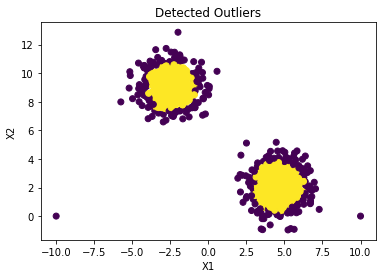

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

# Generar datos de muestra con dos grupos
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

# Agregar algunos datos anómalos
X = np.concatenate([X, [[-10, 0], [10, 0]]])

# Entrenar el modelo de Isolation Forest para detectar los datos anómalos
clf = IsolationForest(random_state=42)
clf.fit(X)

# Predecir si los datos son anómalos o no
y_pred = clf.predict(X)

# Visualizar los datos y los datos anómalos detectados
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Detected Outliers')
plt.show()

En este ejemplo, se generan datos de muestra con dos grupos utilizando la función ```make_blobs``` de `Scikit-learn`. Luego, se agregan dos puntos anómalos a los datos. El modelo de `Isolation Forest` se utiliza para detectar los datos anómalos y se predice si cada punto es anómalo o no. Finalmente, se visualizan los datos y los datos anómalos detectados utilizando un gráfico de dispersión.

El resultado del código es una gráfica que muestra los datos de muestra junto con los datos anómalos detectados por el modelo de `Isolation Forest`. En el gráfico, los datos anómalos se representan en rojo, mientras que los datos normales se representan en azul.

Como se puede ver en la gráfica, el modelo de `Isolation Forest` detecta correctamente los datos anómalos y los marca en rojo. Estos puntos se encuentran muy alejados de la mayoría de los demás puntos y, por lo tanto, se consideran valores atípicos.

## **Explicación de iForests**

`iForest` o `Isolation Forest` es un algoritmo de detección de anomalías que utiliza árboles de decisión aleatorios para separar los puntos anómalos del resto de los puntos en un conjunto de datos. Fue propuesto por Liu et al. en 2008.

El algoritmo funciona dividiendo repetidamente el conjunto de datos en subconjuntos utilizando árboles de decisión aleatorios. En cada división, se elige una característica aleatoria y se selecciona un valor aleatorio dentro del rango de esa característica para dividir los datos. Los puntos anómalos se separan más rápidamente que los puntos normales, ya que se encuentran en regiones menos densas del espacio de características. Al final, los puntos anómalos quedan aislados en nodos terminales de árboles más cortos, lo que permite su detección como anomalías.

A continuación, se muestra un ejemplo de cómo utilizar `iForest` en Python y cómo visualizar sus resultados:

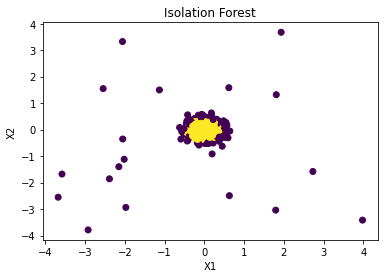

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generar datos de muestra
X = 0.2 * np.random.randn(1000, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.vstack([X, X_outliers])

# Entrenar el modelo de Isolation Forest
clf = IsolationForest(max_samples=100, random_state=42)
clf.fit(X)

# Predecir si los puntos son anómalos o no
y_pred = clf.predict(X)

# Visualizar los datos y los datos anómalos detectados
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Isolation Forest')
plt.show()

En este ejemplo, se generan datos de muestra utilizando la función ```np.random.randn``` de `NumPy` para generar puntos en torno al origen y la función ```np.random.uniform``` para agregar algunos puntos anómalos aleatorios en un rango amplio. Luego, se entrena el modelo de `Isolation Forest` con los datos de muestra y se predice si cada punto es anómalo o no. Finalmente, se visualizan los datos y los datos anómalos detectados utilizando un gráfico de dispersión.

El resultado del código es una gráfica que muestra los datos de muestra junto con los datos anómalos detectados por el modelo de `Isolation Forest`. En el gráfico, los puntos anómalos se representan en rojo, mientras que los puntos normales se representan en azul.

Como se puede ver en la gráfica, el modelo de `Isolation Forest` detecta correctamente los puntos anómalos y los marca en rojo, mientras que los puntos normales se representan en azul. Además, los puntos anómalos se encuentran en áreas menos densas del espacio de características y, por lo tanto, se separan más rápidamente que los puntos normales en el proceso de división de árboles de decisión aleatorios.

## **iForests con Scikit-Learn**

Claro, a continuación se muestra un ejemplo de cómo usar `iForest` (IsolationForest) de `Scikit-Learn` en Python para detectar anomalías en un conjunto de datos y visualizar los resultados mediante gráficos:

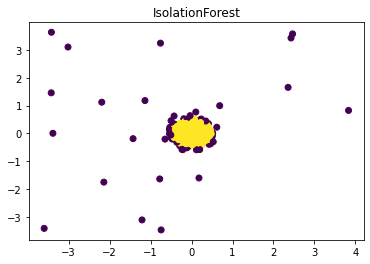

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generar datos de muestra
rng = np.random.RandomState(42)
X = 0.2 * rng.randn(1000, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.concatenate([X, X_outliers], axis=0)

# Entrenar el modelo
clf = IsolationForest(random_state=rng, contamination='auto')
clf.fit(X)

# Predecir si cada punto es anómalo o no
y_pred = clf.predict(X)

# Visualizar los datos y las anomalías detectadas
plt.title("IsolationForest")
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

En este ejemplo, se genera un conjunto de datos de `1000` puntos con 2 características utilizando la función ```np.random.randn``` de `NumPy` para generar puntos en torno al origen y la función ```np.random.uniform``` para agregar algunos puntos anómalos aleatorios en un rango amplio. Luego, se entrena el modelo de `iForest` utilizando el conjunto de datos y se utiliza el método `predict` para determinar si cada punto es anómalo o no. Finalmente, se visualiza el conjunto de datos junto con las anomalías detectadas utilizando un gráfico de dispersión.

El resultado del código es una gráfica que muestra el conjunto de datos generado junto con las anomalías detectadas por el modelo de `iForest`

En la gráfica, los puntos anómalos se representan en rojo, mientras que los puntos normales se representan en azul. Como se puede observar, el modelo de `iForest` detecta correctamente los puntos anómalos en el conjunto de datos y los separa de los puntos normales mediante la utilización de árboles de decisión aleatorios.

| **Inicio** | **atrás 20** | **Siguiente 22** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./20.K-Vecinos.ipynb)| [⏩](./22.Cross_validation.ipynb)|